# Crime Data Analysis

In [1]:

## 1. Data Cleaning

### 1.1 Load the Dataset

import pandas as pd

# Load the dataset

df = pd.read_csv(r'E:\Internship\Week 3\Task 3.1\Crime Data.csv')


# Display the first few rows of the dataset
df.head()

ID Case Number                    Date                 Block  IUCR  \
0  11037294    JA371270  03/18/2015 12:00:00 PM     0000X W WACKER DR  1153   
1  11646293    JC213749  12/20/2018 03:00:00 PM  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333           1/5/2016 0:25   055XX S ROCKWELL ST  1153   
3  11645959    JC211511  12/20/2018 04:00:00 PM    045XX N ALBANY AVE  2820   
4  11645601    JC212935           1/6/2014 0:01   087XX S SANGAMON ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  42.0            32.0        11   
1            APARTMENT   False     False  ...  36.0            19.0        11   
2                  NaN   False     False  ...  15.0            63.0        11   
3            RESIDENCE   False     False  ...  33.0            14.0       08A   
4            RESIDENCE   False     False  ...  21.0            71.0        11   

   X Coordinate Y Coordinate  Year      Updated On  Latitude Longitude  \
0           NaN          NaN  2015  1/8/2017 15:52       NaN       NaN   
1           NaN          NaN  2018  6/4/2019 16:04       NaN       NaN   
2           NaN          NaN  2016  6/4/2019 16:04       NaN       NaN   
3           NaN          NaN  2018  6/4/2019 16:04       NaN       NaN   
4           NaN          NaN  2014  6/4/2019 16:04       NaN       NaN   

   Location  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 22 columns]

In [12]:
# Check for missing values in crucial columns
missing_values = df[['Beat', 'District', 'Ward']].isnull().sum()
print(missing_values)

Beat          0
District      1
Ward        337
dtype: int64


In [24]:
# Fill missing values with mode
for column in ['Beat', 'District', 'Ward']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Verify if there are any missing values left
missing_values_after = df[['Beat', 'District', 'Ward']].isnull().sum()
print(missing_values_after)

Beat        0
District    0
Ward        0
dtype: int64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_57796\3161704333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


#Data Transformation

In [30]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

# Extract the year and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Display the first few rows to verify the new column
df.head()



C:\Users\PMLS\AppData\Local\Temp\ipykernel_57796\3431487325.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


ID Case Number                Date                 Block  IUCR  \
0  11037294    JA371270 2015-03-18 12:00:00     0000X W WACKER DR  1153   
1  11646293    JC213749 2018-12-20 15:00:00  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333                 NaT   055XX S ROCKWELL ST  1153   
3  11645959    JC211511 2018-12-20 16:00:00    045XX N ALBANY AVE  2820   
4  11645601    JC212935                 NaT   087XX S SANGAMON ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  42.0            32.0        11   
1            APARTMENT   False     False  ...  36.0            19.0        11   
2                  NaN   False     False  ...  15.0            63.0        11   
3            RESIDENCE   False     False  ...  33.0            14.0       08A   
4            RESIDENCE   False     False  ...  21.0            71.0        11   

   X Coordinate Y Coordinate    Year      Updated On  Latitude Longitude  \
0           NaN          NaN  2015.0  1/8/2017 15:52       NaN       NaN   
1           NaN          NaN  2018.0  6/4/2019 16:04       NaN       NaN   
2           NaN          NaN     NaN  6/4/2019 16:04       NaN       NaN   
3           NaN          NaN  2018.0  6/4/2019 16:04       NaN       NaN   
4           NaN          NaN     NaN  6/4/2019 16:04       NaN       NaN   

   Location  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 22 columns]

In [32]:
# Group by 'Year' and 'Primary Type' and count the number of incidents
crime_counts = df.groupby(['Year', 'Primary Type']).size().reset_index(name='Incident Count')

# Display the first few rows of the grouped data
crime_counts.head()


Year         Primary Type  Incident Count
0  2001.0              ASSAULT              16
1  2001.0              BATTERY              44
2  2001.0             BURGLARY               2
3  2001.0  CRIM SEXUAL ASSAULT               2
4  2001.0      CRIMINAL DAMAGE              11

Complex Data Visualization

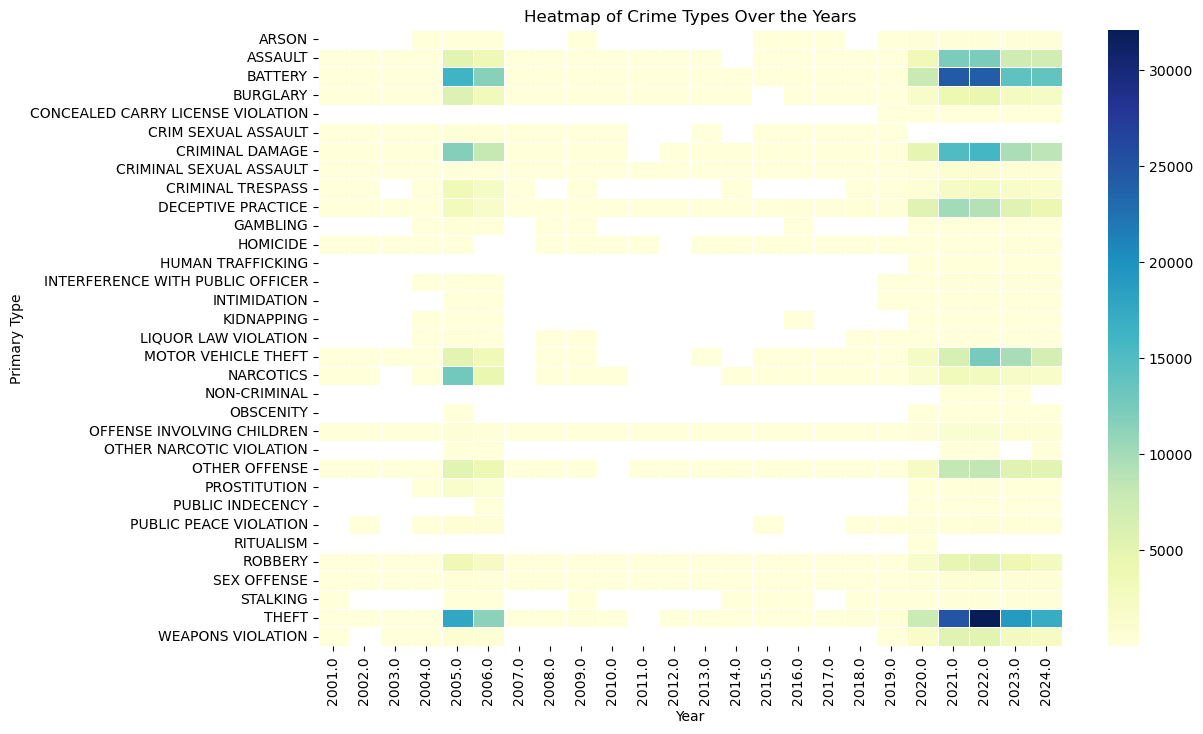

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix for the heatmap
heatmap_data = crime_counts.pivot_table(index='Primary Type', columns='Year', values='Incident Count')

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Crime Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Primary Type')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_57796\1438781328.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_crimes.values, y=top_5_crimes.index, palette='viridis')


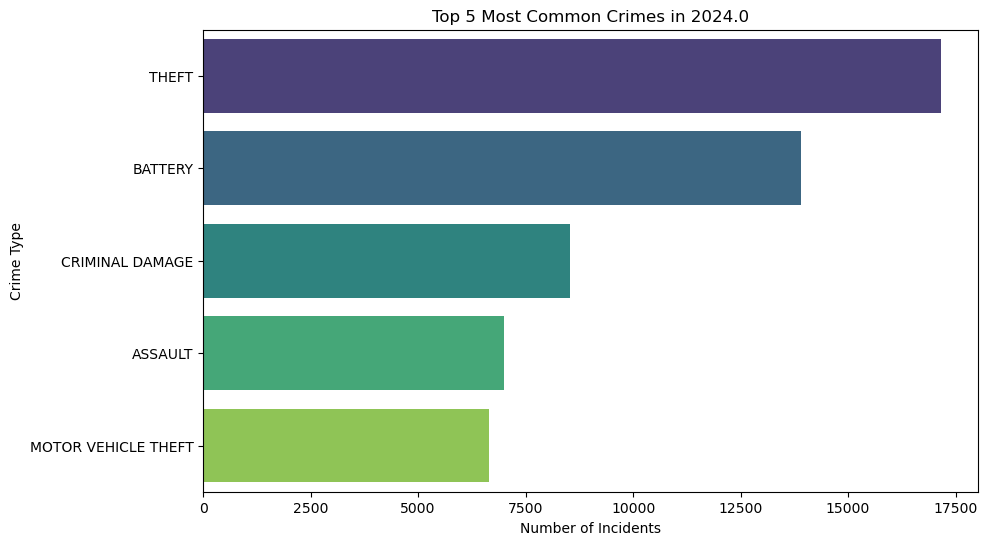

In [39]:
# Get the last complete year in the dataset
last_complete_year = df['Year'].max()

# Filter data for the last complete year
last_year_data = df[df['Year'] == last_complete_year]

# Get the top 5 most common crimes
top_5_crimes = last_year_data['Primary Type'].value_counts().head(5)

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_crimes.values, y=top_5_crimes.index, palette='viridis')
plt.title(f'Top 5 Most Common Crimes in {last_complete_year}')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()